In [1]:
import pandas as pd

In [1]:
df_fonds = pd.read_csv("data/edhec-hedgefundindices.csv", header = 0, index_col = 0, parse_dates = True)

NameError: name 'pd' is not defined

In [3]:
df_fonds.index = pd.to_datetime(df_fonds.index, format = "%Y%m").to_period("M")

In [4]:
df_fonds = df_fonds['2000':]
df_fonds.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2000-01,2.27,1.28,0.88,0.77,0.75,0.88,0.41,0.21,0.75,1.43,1.73,4.27,1.69
2000-02,2.67,-0.22,4.21,5.28,2.53,3.46,0.97,4.08,6.99,2.39,1.85,-13.40,6.66
2000-03,2.43,-1.38,1.03,3.18,1.34,0.69,-0.61,-1.04,0.06,1.31,1.63,-2.30,0.39
2000-04,2.23,-2.41,-1.01,-5.41,1.68,-0.59,-0.06,-3.04,-2.01,1.88,0.92,10.28,-2.69
2000-05,1.49,1.14,-1.32,-4.33,0.62,-0.34,1.07,-0.70,-0.97,1.46,0.80,7.04,-1.22


In [5]:
from scipy.signal import gaussian

In [6]:
import edhec_risk_kit_111 as erk
erk.var_gaussian(df_fonds, 1)

Convertible Arbitrage      3.484471
CTA Global                 5.033613
Distressed Securities      3.143018
Emerging Markets           5.807041
Equity Market Neutral      1.477190
Event Driven               3.085309
Fixed Income Arbitrage     1.951918
Global Macro               2.461907
Long/Short Equity          3.942044
Merger Arbitrage           1.535518
Relative Value             2.160459
Short Selling             10.213030
Funds Of Funds             2.938540
dtype: float64

In [7]:
erk.var_gaussian(df_fonds, 1, modified=True)

Convertible Arbitrage     10.366556
CTA Global                 4.664321
Distressed Securities      4.966909
Emerging Markets           8.679551
Equity Market Neutral      4.143206
Event Driven               4.573181
Fixed Income Arbitrage     6.647930
Global Macro               2.278564
Long/Short Equity          5.138116
Merger Arbitrage           2.128243
Relative Value             4.898484
Short Selling              9.832259
Funds Of Funds             4.879303
dtype: float64

In [8]:
erk.var_historic(df_fonds, 1)

Convertible Arbitrage      3.1674
CTA Global                 5.0938
Distressed Securities      4.2642
Emerging Markets           6.5496
Equity Market Neutral      1.9800
Event Driven               3.8540
Fixed Income Arbitrage     3.0748
Global Macro               2.2632
Long/Short Equity          4.5060
Merger Arbitrage           2.2654
Relative Value             2.1788
Short Selling             10.7684
Funds Of Funds             2.7200
dtype: float64

In [9]:
ind = erk.get_ind_returns()

In [10]:
df_ind = ind['2013':'2017']

In [11]:
df_ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2013-01,0.0554,0.0507,0.0561,0.1313,0.0513,0.0869,0.0256,0.0807,0.0506,0.0922,...,0.0495,0.0663,-0.0118,0.0561,0.0852,0.0646,0.0541,0.0523,0.0632,0.0720
2013-02,0.0384,0.0522,0.0221,0.0000,-0.0654,0.0314,0.0146,0.0135,-0.0095,0.0570,...,0.0221,0.0097,0.0026,0.0463,0.0364,0.0207,0.0061,0.0070,0.0129,0.0443
2013-03,0.0656,0.0531,0.0272,0.0769,0.0778,0.0219,0.0288,0.0651,0.0121,0.0888,...,0.0577,0.0245,0.0319,0.0553,0.0465,0.0325,0.0477,0.0550,0.0453,0.0228
2013-04,0.0284,0.0355,0.0440,0.0451,-0.0029,0.0135,0.0903,0.0259,0.0396,0.0102,...,0.0420,0.0184,-0.0102,-0.0002,-0.0014,0.0017,0.0320,0.0240,0.0157,0.0074
2013-05,-0.0345,-0.0147,-0.0298,0.0218,0.0479,-0.0022,0.0078,0.0163,0.0343,0.0077,...,-0.0171,0.0363,0.0551,0.0221,0.0274,0.0385,0.0239,-0.0030,0.0708,0.0590


In [12]:
col = ['Books', 'Steel', 'Oil', 'Mines']
df_ind = df_ind[col]
df_ind.head()

,Books,Steel,Oil,Mines
2013-01,0.0513,0.0428,0.0788,0.0059
2013-02,-0.0654,-0.0268,0.0052,-0.0756
2013-03,0.0778,0.0210,0.0209,0.0091
2013-04,-0.0029,-0.0441,-0.0129,-0.1057
2013-05,0.0479,0.0384,0.0307,0.0022


In [13]:
er = erk.annualize_rets(df_ind, 12)
cov = df_ind.cov()

In [14]:
er

Books    0.095312
Steel    0.100716
Oil      0.025275
Mines    0.005136
dtype: float64

In [15]:
cov

,Books,Steel,Oil,Mines
Books,0.002720,0.001940,0.001637,0.001539
Steel,0.001940,0.004391,0.002122,0.003391
Oil,0.001637,0.002122,0.002697,0.002179
Mines,0.001539,0.003391,0.002179,0.005232


In [16]:
msr = erk.msr(0.1, er, cov)
for i in msr:
    i = round(i * 100, 2)
    print (i)

0.0
100.0
0.0
0.0


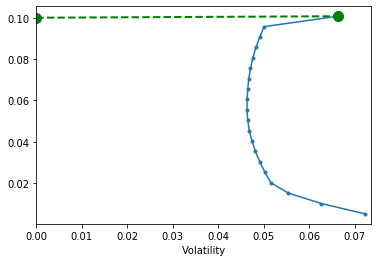

In [17]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

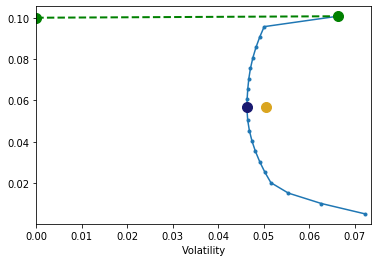

In [18]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

In [19]:
gmv = erk.gmv(cov)
for i in gmv:
    i = round(i * 100, 2)
    print (i)

47.7
0.0
43.41
8.89


In [20]:
import math
cov_18 = ind["2018"][col].cov()
erk.portfolio_vol(msr, cov_18)*(math.sqrt(12))*100

21.9839881814842

In [21]:
erk.portfolio_vol(gmv, cov_18)*(math.sqrt(12))*100

18.973734411213325